# Depression dataset, and music

Medical data:

In [1]:
# https://openneuro.org/datasets/ds003478/versions/1.1.0/download
# James F Cavanagh jcavanagh@unm.edu (2021). EEG: Depression rest. OpenNeuro. [Dataset] doi: 10.18112/openneuro.ds003478.v1.1.0

Musical data:

In [2]:
# https://www.kunstderfuge.com/

In [3]:
#pip install mne numpy

# Recurrence 

In [4]:
# by using the library Pyunicorn, but customising the visualization

import numpy as np
import matplotlib.pyplot as plt
from pyunicorn.timeseries import RecurrencePlot
from tqdm.auto import tqdm
import os
import mne


EPS_std = 0.001
METRIC = "euclidean"


def plot_rp_pyunicorn(series, threshold, time=None, figsize=(6, 6), metric="euclidean"):

    # data preparationPrepare data
    
    ts = np.asarray(series)
    mean = ts.mean()
    std = ts.std()
    
    if std > 0:
        ts = (ts - mean) / std
    else:
        ts = ts - mean  # constant signal safeguard
            
        if std > 0:
            series = (series - mean) / std
        else:
                series = series - mean
    if time is None:
        time = np.arange(len(series))

    # recurrence plot

    rp = RecurrencePlot(
        #series,
        ts,
        metric=metric,
        normalize=True,
        threshold_std=threshold
    )

    R = rp.recurrence_matrix()

    # axes and ticks

    tmin, tmax = time[0], time[-1]
    ticks = np.linspace(tmin, tmax, 6)
    ticklabels = [f"{round(t, 1)}" for t in ticks]

    # plot

    plt.figure(figsize=figsize)

    plt.imshow(
        R,
        cmap="binary",
        origin="lower",
        interpolation="none",
        extent=[tmin, tmax, tmin, tmax],
        vmin=0,
        vmax=1
    )

    plt.xticks(ticks, ticklabels, fontsize=12)
    plt.yticks(ticks, ticklabels, fontsize=12)
    plt.xlabel("Time", fontsize=14)
    plt.ylabel("Time", fontsize=14)

    # Recurrence rate
    rr = R.sum() / R.size
    plt.title(f"Recurrence plot, RR = {rr:.4f}", fontsize=14)

    plt.tight_layout()
    plt.show()
    
    return rp # by adding this, we can still compute laminarity, etc, after showing the plot


# Importing EEG data

Reading /Users/mariamannone/Desktop/new_phd_/depression_dataset/dep_data/sub-055_task-Rest_run-01_eeg.fdt
Reading 0 ... 249154  =      0.000 ...   498.308 secs...
Reading /Users/mariamannone/Desktop/new_phd_/depression_dataset/dep_data/sub-098_task-Rest_run-01_eeg.fdt
Reading 0 ... 248754  =      0.000 ...   497.508 secs...
Using matplotlib as 2D backend.


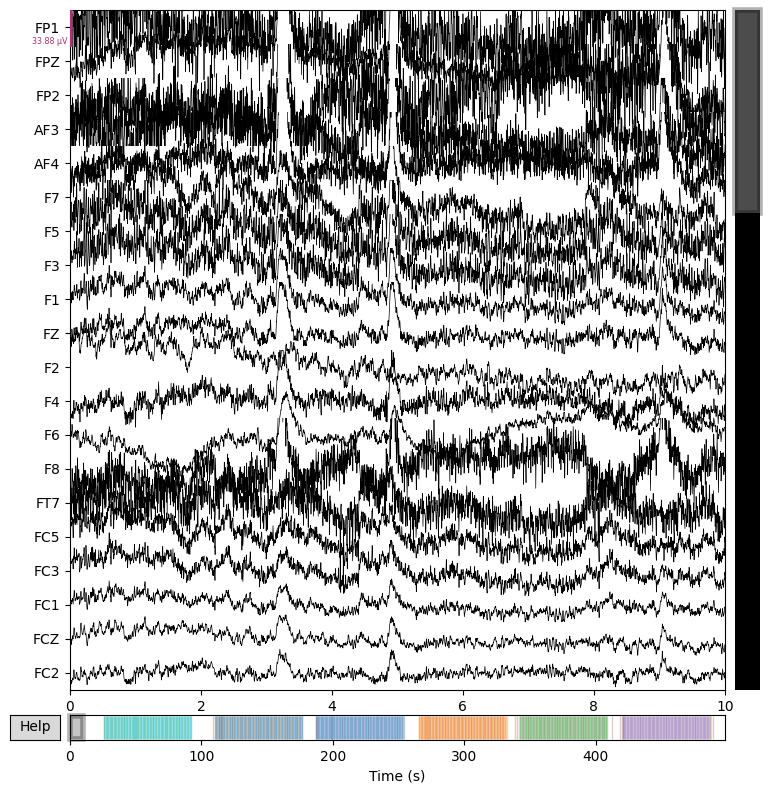

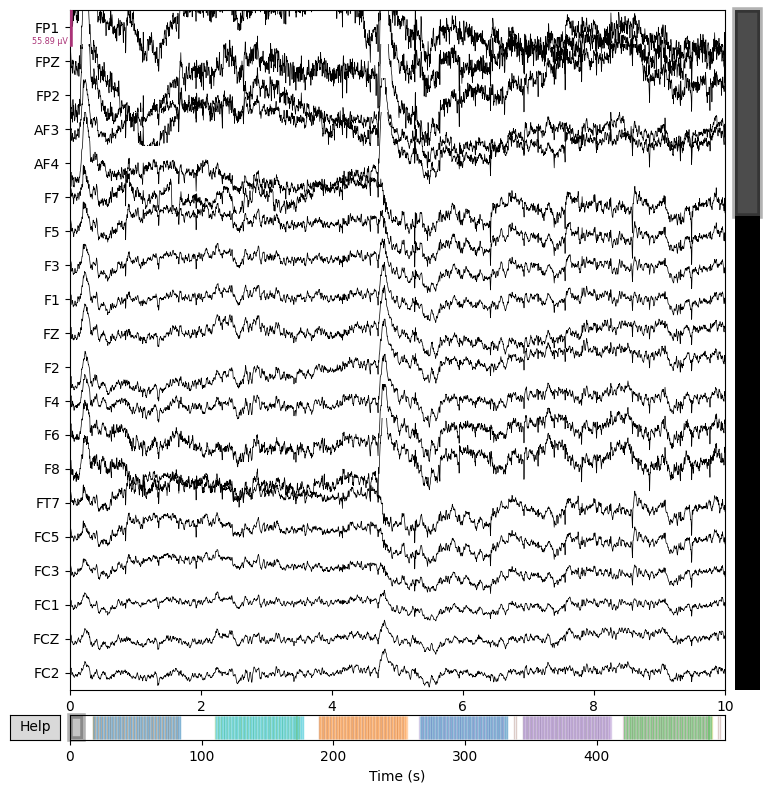

Reading /Users/mariamannone/Desktop/new_phd_/depression_dataset/dep_data/sub-055_task-Rest_run-01_eeg.fdt
Reading 0 ... 249154  =      0.000 ...   498.308 secs...
Reading /Users/mariamannone/Desktop/new_phd_/depression_dataset/dep_data/sub-098_task-Rest_run-01_eeg.fdt
Reading 0 ... 248754  =      0.000 ...   497.508 secs...


In [5]:
###

# Importing the EEG data

###

import mne
import numpy as np


data_dir = "/Users/mariamannone/Desktop/new_phd_/depression_dataset/dep_data"

raw_55 = mne.io.read_raw_eeglab( # 055
    f"{data_dir}/sub-055_task-Rest_run-01_eeg.set",
    preload=True
)

#raw_055

raw_98 = mne.io.read_raw_eeglab( # 098
    f"{data_dir}/sub-098_task-Rest_run-01_eeg.set",
    preload=True
)

raw_55.plot( # 055
    scalings='auto',
    n_channels=20,
    block=True
)


raw_98.plot( # 098
    scalings='auto',
    n_channels=20,
    block=True
)


subjects = {
    "sub-55": "sub-055_task-Rest_run-01_eeg.set",
    "sub-98": "sub-098_task-Rest_run-01_eeg.set"
}

raws = {}

for sub, fname in subjects.items():
    raws[sub] = mne.io.read_raw_eeglab(
        f"{data_dir}/{fname}",
        preload=True
    )

data_055 = raws["sub-55"].get_data()
data_098 = raws["sub-98"].get_data()

In [6]:
eeg_data_55 = raw_55.get_data()
times_55 = raw_55.times
channel_names = raw_55.ch_names
n_channels = eeg_data_55.shape[0]


In [7]:
eeg_data_98 = raw_98.get_data()
times_98 = raw_98.times
channel_names = raw_98.ch_names
n_channels = eeg_data_98.shape[0]

In [8]:
output_dir_55 = "timeseries_sub-055"
os.makedirs(output_dir_55, exist_ok=True)

for i, ch in enumerate(channel_names):
    ts = eeg_data_55[i]
    np.save(
        os.path.join(output_dir_55, f"sub-055_{ch}.npy"),
        ts
    )

output_dir_98 = "timeseries_sub-098"
os.makedirs(output_dir_98, exist_ok=True)

for i, ch in enumerate(channel_names):
    ts = eeg_data_98[i]
    np.save(
        os.path.join(output_dir_98, f"sub-098_{ch}.npy"),
        ts
    )

In [9]:
# raw_55 and raw_98 are already loaded EEGLAB Raw objects
import numpy as np

def extract_channels(raw):
    """Return a dict: {channel_name: time_series}"""
    ch_ts = {}
    for ch_name in raw.ch_names:
        ts = raw.get_data(picks=[ch_name])[0]  # 1D array
        ch_ts[ch_name] = ts
    return ch_ts

# Extract
ts_55 = extract_channels(raw_55)
ts_98 = extract_channels(raw_98)


In [10]:
ts_55.keys()

dict_keys(['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'HEOG', 'VEOG', 'EKG'])

In [11]:
ts_98.keys()

dict_keys(['FP1', 'FPZ', 'FP2', 'AF3', 'AF4', 'F7', 'F5', 'F3', 'F1', 'FZ', 'F2', 'F4', 'F6', 'F8', 'FT7', 'FC5', 'FC3', 'FC1', 'FCZ', 'FC2', 'FC4', 'FC6', 'FT8', 'T7', 'C5', 'C3', 'C1', 'CZ', 'C2', 'C4', 'C6', 'T8', 'M1', 'TP7', 'CP5', 'CP3', 'CP1', 'CPZ', 'CP2', 'CP4', 'CP6', 'TP8', 'M2', 'P7', 'P5', 'P3', 'P1', 'PZ', 'P2', 'P4', 'P6', 'P8', 'PO7', 'PO5', 'PO3', 'POZ', 'PO4', 'PO6', 'PO8', 'CB1', 'O1', 'OZ', 'O2', 'CB2', 'HEOG', 'VEOG'])

In [12]:
# removing the first 6 minutes

t_start = 6*60

sfreq_55 = raw_55.info['sfreq']
sfreq_98 = raw_98.info['sfreq']

def cut_first_minutes(ts_dict, sfreq, t_start):
    samples_start = int(t_start * sfreq)
    return {ch: ts[samples_start:] for ch, ts in ts_dict.items()}

ts_55_cut = cut_first_minutes(ts_55, sfreq_55, t_start)
ts_98_cut = cut_first_minutes(ts_98, sfreq_98, t_start)

Channel selection

In [13]:
n = 5

# 4, 5, 7, 8, 10, 19

ch_name_55 = raw_55.ch_names[n]
ch5_55 = ts_55[ch_name_55]

# Similarly for patient 65
ch_name_98 = raw_98.ch_names[n]
ch5_98 = ts_98[ch_name_98]

Downsample factor

In [14]:
from scipy.signal import decimate

ts_5_55 = ch5_55
ts_5_98 = ch5_98

factor = 10
ts_ds_5_55 = decimate(ts_5_55, factor, ftype='iir')  # returns shorter 1D array
ts_ds_5_98 = decimate(ts_5_98, factor, ftype='iir')  # returns shorter 1D array

# Recurrence analysis of EEG time series

Calculating recurrence plot at fixed threshold in units of time series STD...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


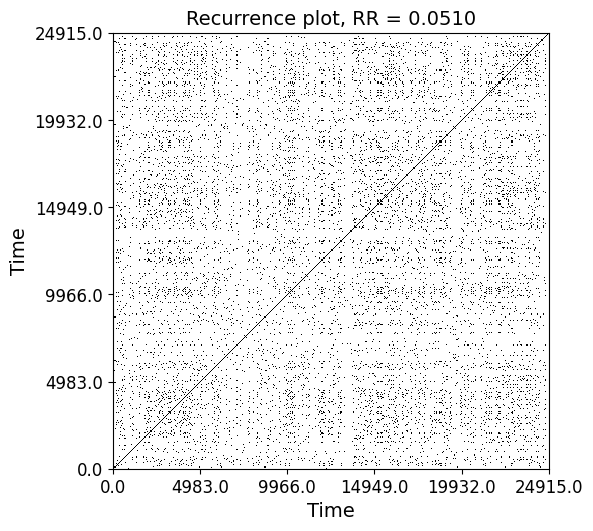

Laminarity (LAM): 0.4010540724743087
Determinism (DET): 0.29207238099937083
Recurrence Rate (RR): 0.051


In [15]:
rp_5_55 = plot_rp_pyunicorn(ts_ds_5_55, 0.001, time=None, figsize=(6, 6), metric="euclidean")


laminarity = rp_5_55.laminarity()
determinism = rp_5_55.determinism()
rr = rp_5_55.recurrence_rate()

print("Laminarity (LAM):", laminarity)
print("Determinism (DET):", determinism)
print(f"Recurrence Rate (RR): {rr:.3f}")

Calculating recurrence plot at fixed threshold in units of time series STD...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


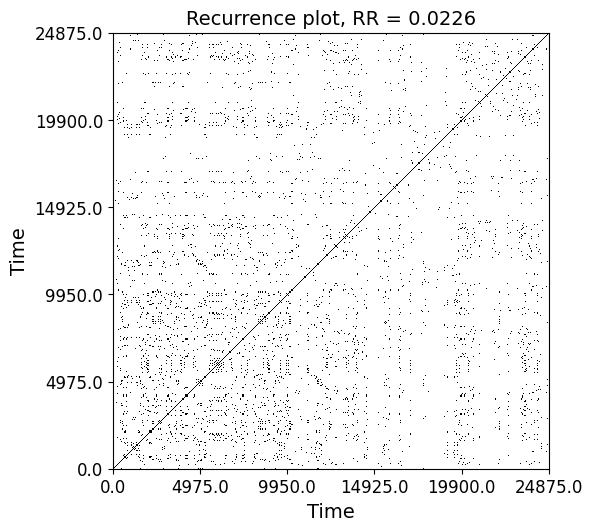

Laminarity (LAM): 0.3378790640655577
Determinism (DET): 0.23753978250985697
Recurrence Rate (RR): 0.023


In [16]:
rp_5_98 = plot_rp_pyunicorn(ts_ds_5_98, 0.001, time=None, figsize=(6, 6), metric="euclidean")

laminarity_ = rp_5_98.laminarity()
determinism_ = rp_5_98.determinism()
rr_ = rp_5_98.recurrence_rate()


print("Laminarity (LAM):", laminarity_)
print("Determinism (DET):", determinism_)
print(f"Recurrence Rate (RR): {rr_:.3f}")

# Music analysis

In [17]:
import pretty_midi
import numpy as np

with the choice of only the first minute

In [18]:
def dominant_pitch_per_bin(
    midi_path,
    bin_seconds = 0.01,
    start_time = 0.0,
    end_time = 1 * 60
):
    pm = pretty_midi.PrettyMIDI(midi_path)
    fs = int(1 / bin_seconds)  # frames per second

    # Get piano roll
    piano_roll = pm.get_piano_roll(fs=fs)  # shape (128, T)

    # Convert times (seconds) → frame indices
    start_frame = int(start_time * fs)

    if end_time is not None:
        end_frame = int(end_time * fs)
        piano_roll = piano_roll[:, start_frame:end_frame]
    else:
        piano_roll = piano_roll[:, start_frame:]

    # Dominant pitch per frame
    loudness = piano_roll.max(axis=0)
    pitches = piano_roll.argmax(axis=0).astype(np.int16)

    # Mark silence
    pitches = pitches[pitches >= 0]


    return pitches

Beethoven, 7th Symphony, 4th movement

In [32]:
#pitches = dominant_pitch_per_bin("/Users/mariamannone/Desktop/new_phd_/Belgium_IEEE-conference-template-062824 3/symphony_7_4_(c)cvikl.mid")

Verdi, Ouverture from La Forza del Destino

In [33]:
#pitches = dominant_pitch_per_bin("/Users/mariamannone/Desktop/Verdi_Wagner/midi_files_Verdi_Wagner/verdi_Part_I.mid")

Tchaikovsky, Swan Lake, 3, Scène

In [44]:
pitches = dominant_pitch_per_bin("/Users/mariamannone/Desktop/new_phd_/Belgium_IEEE-conference-template-062824 3/tchaikovsky_swan_lake_03_(c)lucarelli.mid")


Calculating recurrence plot at fixed threshold in units of time series STD...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


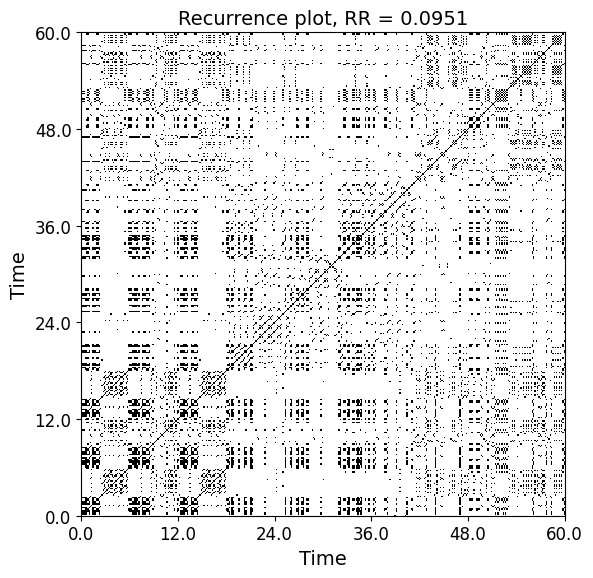

0.44349788845169397
0.4058709001045335
0.09511080332409973


In [45]:
bin_seconds = 0.01
time_1min = np.arange(len(pitches)) * bin_seconds

def remove_repeated_values(x):
    return x[np.insert(x[1:] != x[:-1], 0, True)]

pitches_clean = remove_repeated_values(pitches)
intervals = np.diff(pitches_clean)

#rp_music = plot_rp_pyunicorn(intervals, threshold=0.5)

rp_music = plot_rp_pyunicorn(
    series=intervals,
    threshold=0.1,
    time=time_1min,
    figsize=(6, 6),
    metric="euclidean"
)

laminarity__ =rp_music.laminarity()
determinism__ = rp_music.determinism()
rr__ = rp_music.recurrence_rate()

print(laminarity__)
print(determinism__)
print(rr__)

# Cross-recurrence

Calculating cross recurrence plot at fixed threshold...
Calculating the supremum distance matrix...


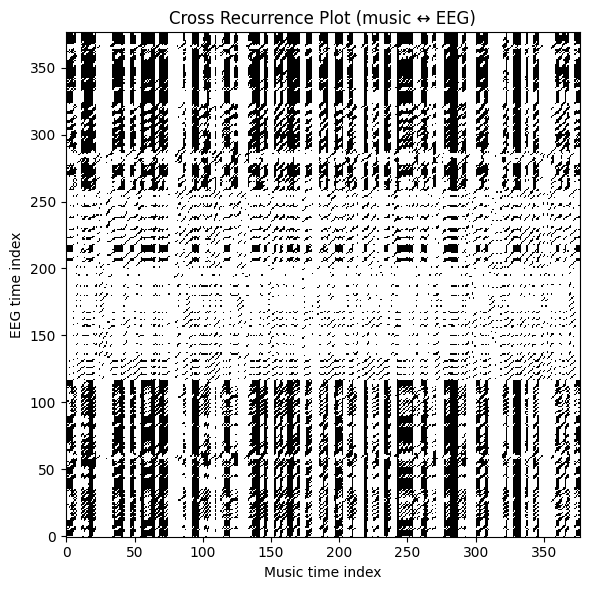

Cross Recurrence Rate (CRP) : 0.2799850839730104


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from pyunicorn.timeseries import CrossRecurrencePlot
from pyunicorn.timeseries import JointRecurrencePlot

# -----------------------------------
# Helper: Time-delay embedding
# -----------------------------------
def embed_ts(ts, dim=3, tau=1):
    """
    Time-delay embedding of a 1D time series.
    Returns array of shape (N - (dim-1)*tau, dim)
    """
    ts = np.asarray(ts).flatten()
    N = len(ts)
    if N < dim*tau:
        raise ValueError("Time series too short for embedding")
    return np.array([ts[i:i + dim*tau:tau] for i in range(N - (dim-1)*tau)])

# -----------------------------------
# Inputs
# -----------------------------------
music_series = intervals      # musical pitch intervals or dynamics
n = 19

ch_name_55 = raw_55.ch_names[n]
eeg_ch = ts_55[ch_name_55]

#ch_name_98 = raw_98.ch_names[n]
#eeg_ch = ts_98[ch_name_98]

# -----------------------------------
# Optional: time-differenced dynamics
# -----------------------------------
music_dyn = np.abs(np.diff(music_series))
eeg_dyn   = np.abs(np.diff(eeg_ch))

# -----------------------------------
# Embed time series
# -----------------------------------
embedding_dim = 3  # can adjust
tau = 1

music_emb = embed_ts(music_dyn, dim=embedding_dim, tau=tau)
eeg_emb   = embed_ts(eeg_dyn, dim=embedding_dim, tau=tau)

# Match lengths
N = min(len(music_emb), len(eeg_emb))
music_emb = music_emb[:N]
eeg_emb   = eeg_emb[:N]



# -----------------------------------
# Normalize each series (important!)
# -----------------------------------
music_emb = (music_emb - np.mean(music_emb, axis=0)) / np.std(music_emb, axis=0)
eeg_emb   = (eeg_emb - np.mean(eeg_emb, axis=0)) / np.std(eeg_emb, axis=0)


# -----------------------------------
# Cross Recurrence Plot
# -----------------------------------
# Using correlation metric to reduce scale issues
crp = CrossRecurrencePlot(
    music_emb,
    eeg_emb,
    metric = "supremum",
    threshold = 1
)


# -----------------------------------
# Plot CRP
# -----------------------------------
plt.figure(figsize=(6, 6))
plt.imshow(
    crp.recurrence_matrix(),
    cmap="binary",
    origin="lower",
    interpolation="none",
    aspect="auto"
)
plt.xlabel("Music time index")
plt.ylabel("EEG time index")
plt.title("Cross Recurrence Plot (music ↔ EEG)")
plt.tight_layout()
plt.show()

# -----------------------------------
# Cross-RQA measures
# -----------------------------------
print("Cross Recurrence Rate (CRP) :", crp.recurrence_rate())



# Introducing a new quantifier

We propose here a density comparison, 
taking into account the difference of sizes of the pairs of recurrence plots (music and EEG).
The new quantifier computes local density maps for the RP of music and the one of EEG.
We resize one of the plots to match the size of the other.
We consider here agglomerate maps rather than one-to-one matrices, for computational reasons.
Thus, this is a coarse-grained approach.
Finally, we obtain a degree of Local Density Similarity (LDS). 

In [47]:
import numpy as np
from scipy.signal import convolve2d
from skimage.transform import resize
from PIL import Image


def local_density_map(rp_matrix, window_size=5):
    """
    Compute local density map using convolution.
    """
    kernel = np.ones((window_size, window_size))
    density = convolve2d(rp_matrix, kernel, mode='same', boundary='fill', fillvalue=0)
    density /= window_size**2
    return density

# Coarse-grained downsampling approach

import numpy as np
from skimage.measure import block_reduce

def coarse_density_map(rp_matrix, grid_size=(50, 50)):
    """
    Reduce a recurrence plot to a coarse density map.
    rp_matrix: 2D binary matrix
    grid_size: number of coarse cells (rows, cols)
    """
    n_rows, n_cols = rp_matrix.shape
    # Determine block size
    block_row = max(n_rows // grid_size[0], 1)
    block_col = max(n_cols // grid_size[1], 1)
    # Use block_reduce to compute mean in each block
    density = block_reduce(rp_matrix, block_size=(block_row, block_col), func=np.mean)
    return density

def fast_density_similarity(rp1_matrix, rp2_matrix, grid_size=(50,50), method='corr'):
    """
    Approximate similarity of local densities using coarse-grained RP.
    """
    ld1 = coarse_density_map(rp1_matrix, grid_size)
    ld2 = coarse_density_map(rp2_matrix, grid_size)
    
    # Resize smaller one to match
    if ld1.shape != ld2.shape:
        target_shape = (max(ld1.shape[0], ld2.shape[0]), max(ld1.shape[1], ld2.shape[1]))
        ld1 = np.array(Image.fromarray(ld1).resize(target_shape, resample=Image.BILINEAR))
        ld2 = np.array(Image.fromarray(ld2).resize(target_shape, resample=Image.BILINEAR))
    
    v1 = ld1.flatten()
    v2 = ld2.flatten()
    
    if method == 'corr':
        return np.corrcoef(v1, v2)[0,1]
    elif method == 'cos':
        return np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))



In [48]:
#local_density_map(rp_music.recurrence_matrix(), window_size=5)

In [49]:
#local_density_map(rp_5_55.recurrence_matrix(), window_size=5)

In [50]:
#local_density_map(rp_5_98.recurrence_matrix(), window_size=5)

In [51]:
#pip install scikit-image

Calculating recurrence plot at fixed threshold in units of time series STD...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


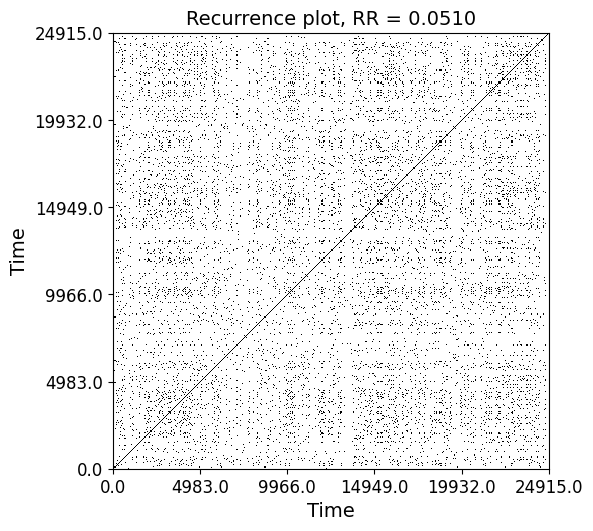

Calculating recurrence plot at fixed threshold in units of time series STD...
Calculating recurrence plot at fixed threshold...
Calculating the euclidean distance matrix...


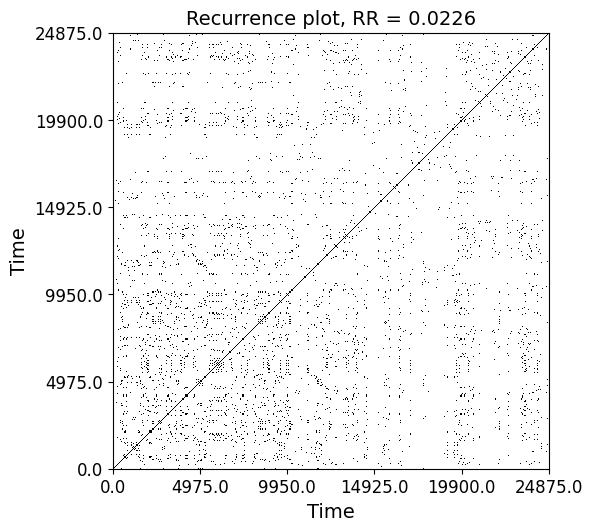

In [52]:
# Extract matrices from the RPs
R_music = rp_music.recurrence_matrix()


#channel selection also here
n = 5
# 3, 4, 7, 8, 10, 19
#decimation factor
factor = 10

ch_name_55 = raw_55.ch_names[n]
ch5_55 = ts_55[ch_name_55]
ts_5_55 = ch5_55
ts_ds_5_55 = decimate(ts_5_55, factor, ftype='iir')  # returns shorter 1D array
rp_5_55 = plot_rp_pyunicorn(ts_ds_5_55, 0.001, time=None, figsize=(6, 6), metric="euclidean")




# Similarly for patient 98
ch_name_98 = raw_98.ch_names[n]
ch5_98 = ts_98[ch_name_98]
ts_5_98 = ch5_98
ts_ds_5_98 = decimate(ts_5_98, factor, ftype='iir')  # returns shorter 1D array
rp_5_98 = plot_rp_pyunicorn(ts_ds_5_98, 0.001, time=None, figsize=(6, 6), metric="euclidean")


In [53]:
R_eeg_55   = rp_5_55.recurrence_matrix()
R_eeg_98   = rp_5_98.recurrence_matrix()

# Compute fast approximate similarity
lds_fast1 = fast_density_similarity(R_music, R_eeg_55, grid_size=(50,50), method='corr')
print("LDL, MDD =", lds_fast1)

lds_fast2 = fast_density_similarity(R_music, R_eeg_98, grid_size=(50,50), method='corr')
print("LDL, normal =", lds_fast2)

LDL, MDD = 0.08501741938335512
LDL, normal = 0.19388409810241905


In [55]:
##########
#Channel 4
##########

#Beethoven
#LDL, MDD = 0.161
#LDL, normal = 0.442

#Verdi
#LDL, MDD = 0.180
#LDL, normal = 0.290

#Tchaikovsky
#LDL, MDD = 0.103
#LDL, normal = 0.178

##########
#Channel 5

#Beethoven
#LDL, MDD = 0.148
#LDL, normal = 0.465


#Verdi
#LDL, MDD = 0.008
#LDL, normal = 0.300


#Tchaikovsky
#LDL, MDD = 0.085
#LDL, normal = 0.194


##########
#Channel 7
##########

#Beethoven
#LDL, MDD = 0.153
#LDL, normal = 0.418

#Verdi
#LDL, MDD = 0.010
#LDL, normal = 0.246

#Tchaikovsky
##LDL, MDD = 0.080
#LDL, normal = 0.169

##########
#Channel 8
##########

#Beethoven
#LDL, MDD = 0.152
#LDL, normal = 0.339


#Verdi
#LDL, MDD = -0.002
#LDL, normal = 0.275


#Tchaikovsky
#LDL, MDD = 0.0867
#LDL, normal = 0.198

##########
#Channel 10
##########

#Beethoven
#LDL, MDD = 0.163
#LDL, normal = 0.300

#Verdi
#LDL, MDD = 0.0469
#LDL, normal = 0.215

#Tchaikovsky
#LDL, MDD = -0.0257
#LDL, normal = 0.146


##########
#Channel 19
##########

#Beethoven
#MDD, LD = 0.235 
#normal, LDL = 0.473 

#Verdi
#MDD, LDL = 0.017
#normal, LDL = 0.180

#Tchaikovsky
#MDD, LDL = 0.111
#normal, LDL = 0.185